In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

# initialize time array
# sampled at 25 KHz
dt1 = 0.00004
fs1 = 1 / dt1
t1 = np.arange(0, 100, dt1)

print("sapmling freq:", fs1)

sapmling freq: 24999.999999999996


LIF neuron model

\begin{align}
\tau_m\frac{dV}{dt} = V_L - V + \frac{I}{g_L}
\end{align}

\begin{align}
dV = \frac{dt}{\tau_m} (V_L - V + \frac{I}{g_L})
\end{align}

vl : leak reversal potential [mV]\
gl : leak conductance [nS]\
tau_m : membrane time constant [ms]\
v_th : spike threshold [mV]\
v_reset : reset potential [mV]\
I : input current [pA]

In [5]:
# parameters dictionary
pars = {
    "vl" : -75, # leak reversal potential [mV]
    "gl" : 0.01, # leak conductance [uS]
    "tau_m" : 10, # membrane time constant [ms]
    "v_th" : -55, # spike threshold [mV]
    "v_reset" : -75, # reset potential [mV]
    "v_init" : -65 # initial potential [mV]
}

# lif neuron simulation function
def lif(x1):
    # initialize output array
    y1 = np.zeros(len(t1)) + pars["v_init"]

    for i1 in range(len(x1) - 1):
        if y1[i1] < pars["v_th"]:
            # euler's method
            dy1 = (pars["vl"] - y1[i1] + (x1[i1]/pars["gl"])) * (dt1/pars["tau_m"])
            y1[i1+1] = y1[i1] + dy1
        else:
            y1[i1+1] = pars["v_reset"]
    return y1

# positive part function
def pos(x1):
    x2 = np.zeros(len(x1))
    for i1 in range(len(x1)):
        if x1[i1] > 0:
            x2[i1] = x1[i1]
    return x2

# negative part function
def neg(x1):
    x2 = np.zeros(len(x1))
    for i1 in range(len(x1)):
        if x1[i1] < 0:
            x2[i1] = x1[i1]
    x2 = np.absolute(x2)
    return x2

# spike times function
def spike_time(x1):
    x2 = []
    x2 = np.array(x2)
    for i1 in range(len(x1)):
        if x1[i1] == pars["v_reset"]:
            x2 = np.append(x2, t1[i1])
    return x2

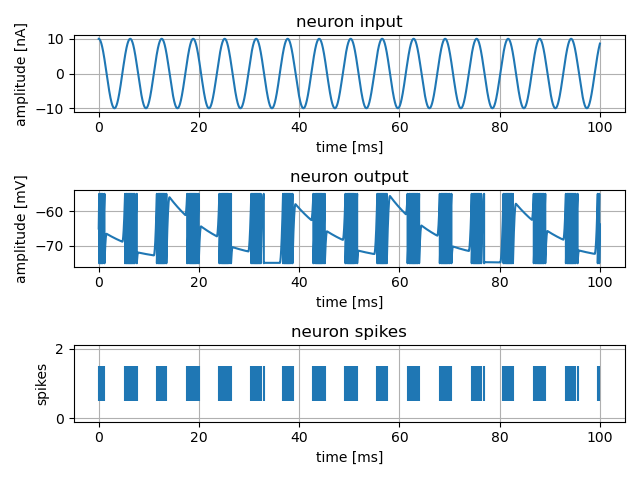

In [6]:
# positive part of position function
# input current array [nA]
x1 = np.cos(t1) * 10
x2 = pos(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()

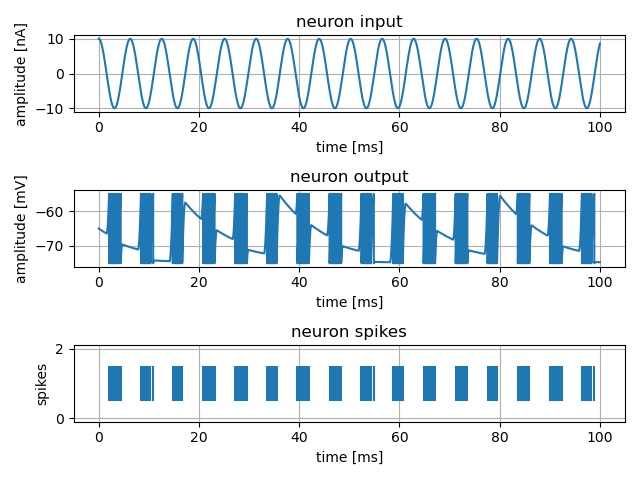

In [7]:
# negative part of position function
# input current array [nA]
x1 = np.cos(t1) * 10
x2 = neg(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()

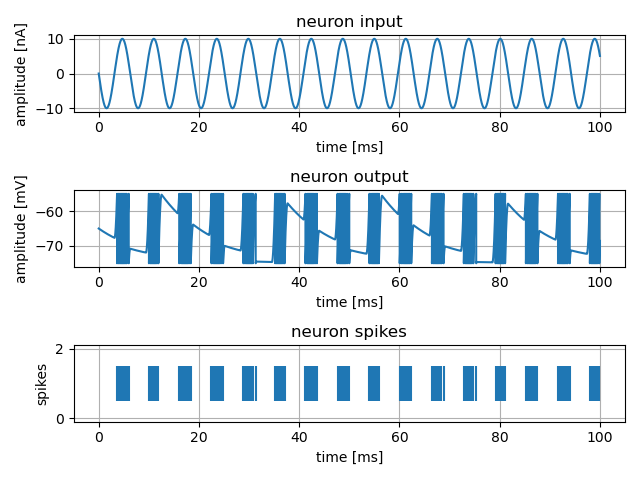

In [8]:
# positive part of velocity function
# input current array [nA]
x1 = np.cos(t1 + np.pi/2) * 10
x2 = pos(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()

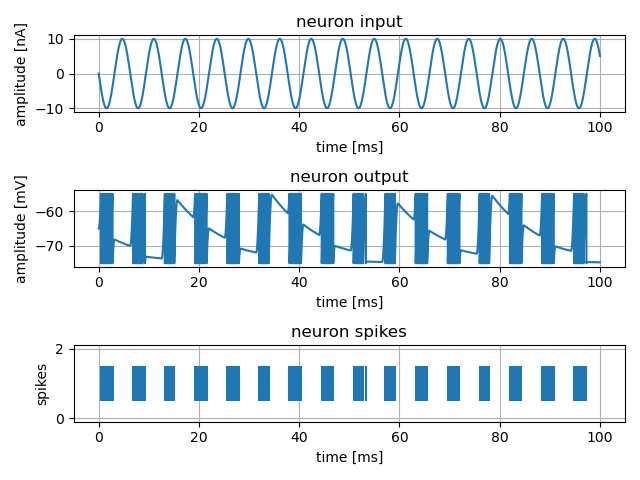

In [9]:
# negative part of velocity function
# input current array [nA]
x1 = np.cos(t1 + np.pi/2) * 10
x2 = neg(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()

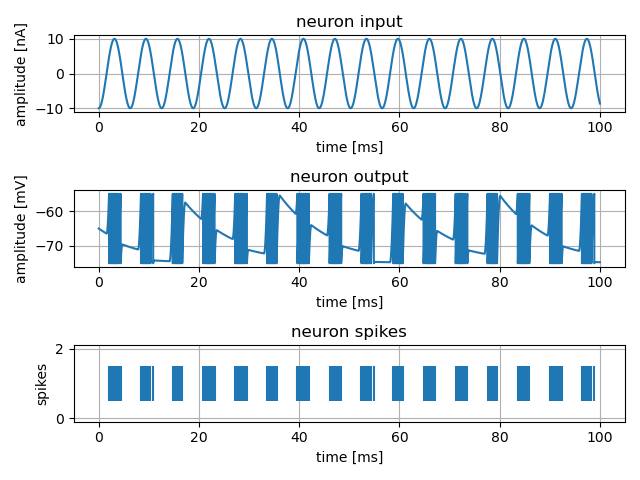

In [10]:
# positive part of acceleration function
# input current array [nA]
x1 = np.cos(t1 + np.pi) * 10
x2 = pos(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()

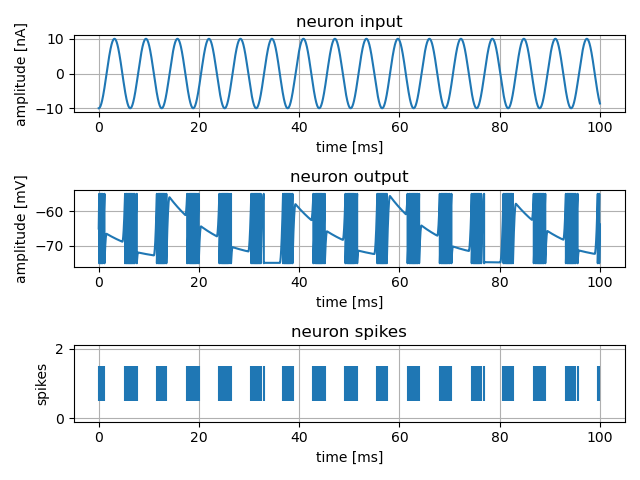

In [11]:
# negative part of acceleration function
# input current array [nA]
x1 = np.cos(t1 + np.pi) * 10
x2 = neg(x1)

# initialize output
y1 = lif(x2)

# initialize spike array
spikes1 = spike_time(y1)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t1, x1)
plt.title("neuron input")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [nA]")
x_lim1 = plt.xlim()
plt.grid()

plt.subplot(3,1,2)
plt.plot(t1, y1)
plt.title("neuron output")
plt.xlabel("time [ms]")
plt.ylabel("amplitude [mV]")
plt.xlim(x_lim1)
plt.grid()

plt.subplot(3,1,3)
plt.eventplot(spikes1)
plt.title("neuron spikes")
plt.xlabel("time [ms]")
plt.ylabel("spikes")
plt.xlim(x_lim1)
plt.grid()

plt.tight_layout()
plt.show()